In [6]:
import numpy as np
import copy
from PIL import Image
import open3d as o3d
import matplotlib.pyplot as plt
from magpie.perception import pcd
from open3d.web_visualizer import draw

In [68]:
from magpie import realsense_wrapper as real
rsc = real.RealSense()
rsc.initConnection()

In [8]:
from magpie.perception.label_owlvit import LabelOWLViT
path = "google/owlvit-base-patch32"
label_vit = LabelOWLViT(path)

In [9]:
from magpie.perception.mask_sam import MaskSAM
ckpt = "/home/will/workspace/owlvit_segment_anything/sam_vit_h_4b8939.pth"
mask_sam = MaskSAM(ckpt)

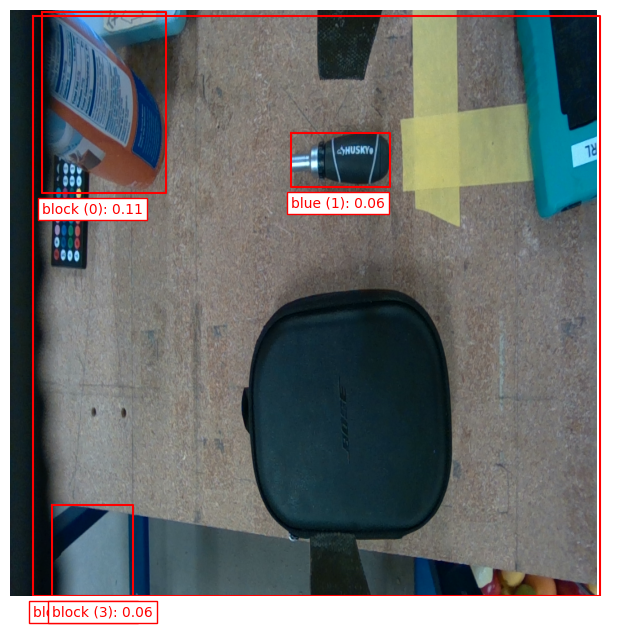

In [78]:
p, rgbd_image = rsc.getPCD()
image = np.array(rgbd_image.color)
queries = ["a photo of an apple", "a photo of a lemon", "a photo of a lime", "a photo of a pear", "a photo of a onion"]
queries = ["a photo of an blue cylindrical container", "a photo of a small red cubic block", "a photo of a screwdriver handle" ]
# queries = ["a photo of a black handle of a pair of scissors"]
abbrevq = ["apple", "lemon", "lime", "pear", "onion"]
abbrevq = ["blue", "block", "handle"]
label_vit.set_threshold(0.05)
bboxes, uboxes = label_vit.label(image, queries, abbrevq, plot=True)


In [80]:
index = 1
# this does the [x, y, z] --> [y, -x, z] grasp pose switch, and the -y inversio on the y-axis orientation
# rgbd_image, cpcd, tmat = pcd.get_segment(label_vit.boxes, index, rgbd_image, rsc, type="box", display=False)
rgbd_image, cpcd, tmat = pcd.get_segment(label_vit.boxes, 
                                         index, 
                                         rgbd_image, 
                                         rsc, 
                                         type="box-dbscan", 
                                        #  type="box", 
                                         method="quat", 
                                         display=True)
tmat, tmat[:3, 3]

[Open3D INFO] Window window_18 created.


WebVisualizer(window_uid='window_18')

(array([[-0.2635743 , -0.96360807,  0.04458778, -0.08718059],
        [ 0.96181987, -0.26605437, -0.06416865, -0.05377337],
        [ 0.07369621,  0.02597221,  0.99694248,  0.33084691],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([-0.08718059, -0.05377337,  0.33084691]))

[Open3D INFO] Sending init frames to window_18.


In [71]:
tmat

array([[ 0.97967119,  0.05048874, -0.19415262, -0.07526022],
       [-0.17952486, -0.21126643, -0.96080035, -0.02212539],
       [-0.08952753,  0.97612365, -0.19790765,  0.21919241],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

[3235:936][6380] (stun_port.cc:96): Binding request timed out from 192.168.0.x:56793 (enp3s0)


In [19]:
# Segmentation Masks
mask_sam.set_image_and_labels(np.array(rgbd_image.color), np.array([np.array(i[0]) for i in label_vit.boxes]), label_vit.labels)

In [31]:
masks = mask_sam.get_masks(label_vit.labels)

In [33]:
# mask_sam.show_all_masks(np.array(rgbd_image.color))

In [41]:
index = 0
rgbd_image, mcpcd, tmat = pcd.get_segment(mask_sam.masks, 
                                          index, 
                                          rgbd_image, 
                                          rsc, 
                                          type="mask", 
                                          viz_scale=2500.0, 
                                          display=True,
                                          method="quat")

[2.89783432e-04 3.02189035e-04 8.93685382e-05]
[[0.72445858 0.         0.         0.        ]
 [0.         0.75547259 0.         0.        ]
 [0.         0.         0.22342135 0.        ]
 [0.         0.         0.         1.        ]]
[[ 0.15715948 -0.39169133 -0.90657531  0.1473904 ]
 [ 0.69602605 -0.60730595  0.38304988 -0.07536984]
 [-0.7006059  -0.69119996  0.17718349  0.19988548]
 [ 0.          0.          0.          1.        ]]
[[ 0.11385553 -0.29591207 -0.20254828  0.1473904 ]
 [ 0.50424205 -0.458803    0.08558152 -0.07536984]
 [-0.50755996 -0.52218262  0.03958657  0.19988548]
 [ 0.          0.          0.          1.        ]]
TriangleMesh with 1134 points and 2240 triangles.
[Open3D INFO] Window window_8 created.


WebVisualizer(window_uid='window_8')

[Open3D INFO] Sending init frames to window_8.


In [42]:
tmat, tmat[:3, 3]

(array([[ 0.15715948, -0.39169133, -0.90657531, -0.07536984],
        [ 0.69602605, -0.60730595,  0.38304988, -0.1473904 ],
        [-0.7006059 , -0.69119996,  0.17718349,  0.19988548],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([-0.07536984, -0.1473904 ,  0.19988548]))

[7443:635][5386] (stun_port.cc:96): Binding request timed out from 192.168.0.x:36333 (enp3s0)
